## Exploratory Data Analysis

In [40]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

#### Reading file

In [41]:
df = pd.read_csv('loan_2014_18.csv')
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,120122535,12000.0,12000.0,12000.0,36 months,7.97%,375.88,A,A5,associate,10+ years,OWN,42000.0,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,27.74,0.0,Jun-1996,715.0,719.0,0.0,NaN,80.0,9.0,1.0,11457.0,37%,16.0,w,0.00,0.00,13500.44,13500.44,12000.00,1500.44,0.0,0.0,0.0,May-2020,2591.95,NaN,May-2020,694.0,690.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.0,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,NaN,8.0,NaN,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,119374887,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,Nurse,10+ years,MORTGAGE,155000.0,Source Verified,2017-09-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,12.35,2.0,Sep-2005,715.0,719.0,1.0,10.0,NaN,20.0,0.0,48309.0,34.1%,42.0,w,6158.89,6158.89,31838.67,31838.67,25841.11,5997.56,0.0,0.0,0.0,May-2020,0.00,Jul-2020,May-2020,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.0,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,24.0,1.0,10.0,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOMECURT,ACTIVE,2.0,0.00,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,123.08000,6189.66,1062.71,N
2,2,119321612,40000.0,40000.0,40000.0,60 months,15.

In [42]:
df = df.drop(df.columns[0], axis=1)
df.shape

(2029952, 141)

#### Identifying the target variable, y

In [43]:
# Defne the mapping
loan_status_mapping = {
    'Fully Paid': 1,
    'Current': 1,
    'In Grace Period': 1,
    'Late (16-30 days)': 0,
    'Late (31-120 days)': 0,
    'Charged Off': 0,
    'Default': 0
}

# Apply the mapping to the 'loan_status' column
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)
df.drop('loan_status', axis=1, inplace=True)

df['loan_status_binary'].value_counts()

loan_status_binary
1    1704881
0     325071
Name: count, dtype: int64

#### Handle missing values

Columns that are missing by more than 50 percent will be removed.

In [44]:
def missing_data_summary(df, threshold=0):
    missing_count = df.isna().sum()
    missing_df = pd.DataFrame(missing_count).reset_index()
    missing_df.columns = ['column', 'missing_count']
    missing_df = missing_df[missing_df['missing_count'] > 0]
    missing_df['missing_percentage'] = (missing_df['missing_count'] / df.shape[0]) * 100
    missing_df = missing_df[missing_df['missing_percentage'] > threshold]
    missing_df = missing_df.sort_values('missing_count', ascending=False)
    missing_df.reset_index(drop=True, inplace=True)
    return missing_df

missing = missing_data_summary(df,51)
missing

,column,missing_count,missing_percentage
0,hardship_loan_status,1956776,96.395186
1,hardship_reason,1956678,96.390358
2,hardship_status,1956677,96.390309
3,hardship_dpd,1956675,96.390210
4,hardship_end_date,1956674,96.390161
5,deferral_term,1956674,96.390161
6,hardship_type,1956674,96.390161
7,hardship_length,1956674,96.390161
8,payment_plan_start_date,1956674,96.390161
9,hardship_start_date,1956674,96.390161


In [45]:
columns_to_drop = missing.iloc[:, 0].tolist()
df = df.drop(columns=columns_to_drop, errors='ignore') 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029952 entries, 0 to 2029951
Columns: 107 entries, id to loan_status_binary
dtypes: float64(82), int64(2), object(23)
memory usage: 1.6+ GB


#### Categorical Features
Preprocessing steps to clean and transform the data in the Categorical Features.

In [47]:
df.select_dtypes(include=['object']).head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
0,36 months,7.97%,A,A5,associate,10+ years,OWN,Source Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,923xx,CA,Jun-1996,37%,w,May-2020,May-2020,Individual,N,N
1,36 months,11.99%,B,B5,Nurse,10+ years,MORTGAGE,Source Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,080xx,NJ,Sep-2005,34.1%,w,May-2020,May-2020,Individual,Y,N
2,60 months,15.05%,C,C4,Driver,9 years,MORTGAGE,Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,778xx,TX,Apr-2002,20.7%,w,May-2020,May-2020,Individual,N,N
3,36 months,7.97%,A,A5,Senior Investigator,5 years,RENT,Not Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,223xx,VA,Jun-2000,57.7%,w,May-2020,May-2020,Individual,N,N
4,36 months,7.21%,A,A3,Registered Nurse,< 1 year,MORTGAGE,Verified,2017-09-01,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,750xx,TX,Dec-2005,16.1%,w,Apr-2020,May-2020,Joint App,Y,N


In [48]:
# Removing leading/trailing whitespaces
df = df.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

# convert dates to 'datetime' types
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

# int_rate and revol_util for int type
df['int_rate%']= pd.to_numeric(df['int_rate'].str.strip('%'))
df['revol_util%'] =pd.to_numeric(df['revol_util'].str.strip('%'))

In [49]:
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
df['region'] = df['addr_state'].map(state_to_region)

#### Drop columns 
1. Title is not useful
2. Zip code is not useful, if not associated with regions. 
3. All payment plans are stated, n
4. emp_title not indicative 
5. int_rate and revol_util has been replaced
6. url is not indicative

In [50]:
columns_to_drop = {'title','zip_code','pymnt_plan', 'emp_title','int_rate','revol_util', 'url'} 
df.drop(columns_to_drop, axis = 1, inplace = True)

#### Convert to Binary
1. Convert debt_settlement_flag to binary
2. Creates a new binary column term_36_months, where '36 months' becomes 1 and everything else (likely '60 months') becomes 0.

In [51]:
df.debt_settlement_flag = np.where(df.debt_settlement_flag == 'Y',1,0)

df.term_36_months = np.where(df.term == '36 months',1,0)
df.drop('term', axis=1, inplace=True)

#### Clean and convert emp_length to numeric

In [52]:
df['emp_length'] = df['emp_length'].fillna('')
df['emp_length'] = pd.to_numeric(df['emp_length'].str.replace('<', '', regex=False).str[:2].str.strip(), errors='coerce')

In [53]:
df['emp_length'].head(10)

0    10.0
1    10.0
2     9.0
3     5.0
4     1.0
5    10.0
6     3.0
7     1.0
8     5.0
9    10.0
Name: emp_length, dtype: float64

#### Handle hardship_flag column
1. Replaces NaN values in hardship_flag with 'N'
2. Converts any values that are exactly 'NaN' (as a string) to 'N'.

In [54]:
df.hardship_flag.fillna('N', inplace=True) #it looks like the Nans are as strings
df.hardship_flag = np.where( df.hardship_flag == 'NaN','N', df.hardship_flag )

#### Check for the number of unique values in categorical column
1. Check if binning is needed
2. Check for inconsistencies or imbalances

In [55]:
def get_sorted_unique_counts(df):
    object_cols = df.select_dtypes(include=['object']).columns
    object_nunique = {col: df[col].nunique() for col in object_cols}
    
    # Convert to DataFrame and sort by unique counts
    unique_counts = pd.DataFrame(list(object_nunique.items()), columns=['Column', 'Unique Count'])
    unique_counts = unique_counts.sort_values(by='Unique Count').reset_index(drop=True)
    
    return unique_counts

get_sorted_unique_counts(df)

,Column,Unique Count
0,initial_list_status,2
1,application_type,2
2,hardship_flag,2
3,verification_status,3
4,home_ownership,5
5,region,5
6,grade,7
7,purpose,14
8,sub_grade,35
9,addr_state,51


In [56]:
def value_counter(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(["object"]).columns:
        print(df[col].value_counts(dropna = False))
        print("\n")

value_counter(df)

grade
C    591304
B    588545
A    394264
D    290516
E    120001
F     34791
G     10531
Name: count, dtype: int64


sub_grade
C1    132442
B5    128339
B4    122760
C2    118336
C3    117664
C4    116100
B1    113099
B3    112899
B2    111448
C5    106762
A5     96619
A4     85953
A1     81395
D1     73405
A3     66457
D2     65396
A2     63840
D3     58384
D4     50676
D5     42655
E1     30128
E2     26086
E3     23633
E5     20282
E4     19872
F1     11407
F2      7658
F3      6404
F4      5020
F5      4302
G1      3524
G2      2292
G3      1816
G4      1504
G5      1395
Name: count, dtype: int64


home_ownership
MORTGAGE    995479
RENT        799121
OWN         234352
ANY            996
NONE             4
Name: count, dtype: int64


verification_status
Source Verified    833961
Not Verified       667220
Verified           528771
Name: count, dtype: int64


purpose
debt_consolidation    1146650
credit_card            468324
home_improvement       136961
other                  1261

#### Observations
- sub_grade
    - already groupped by group - consider dropping
- home_ownership 
    - Majority categories dominate the data - such an imbalance could lead to a biased model where predictions are skewed toward the majority classes 
- purpose 
    - huge imbalance leading to biased models here predictions are skewed toward the majority classes. medical, car, small_businesses, vacation, moving, house etc should be grouped. 
- addr_state 
    - imbalanced - should be grouped.

In [57]:
df.drop('sub_grade', axis=1, inplace = True)

#### Using WoE & IV for categorical features

1. Weight of Evidence (WoE)
    - WoE = ln(Proportion of Non-Event (Defaulted Loan) / Proportion of Event)
    - Information Value (IV) - indicates the predictive power of the categorical variable. 

2. IV (Information Value) 
    - indicates the predictive power of the categorical variable. 
    - IV = Sum ((Proportion of Non-Event − Proportion of Event)⋅ WoE)
    - The threshold of 0.02 for Information Value (IV) is commonly used in feature selection. IV values lower than 0.02 generally indicate that a feature doesn't provide much information about the target variable. Dropping these features helps to reduce noise in the model and improve its performance by keeping only the variables that are useful for prediction.


In [58]:

def process_categorical_columns(df, categorical_cols, target_col, woe_table=None, iv_summary=None, append=False):
    """
    Calculate WoE and IV for given categorical columns, including NaNs as a separate category.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        categorical_cols (list): List of categorical column names to process.
        target_col (str): Name of the binary target column (1 = Good, 0 = Bad).
        woe_table (pd.DataFrame): Existing WoE table (required if append=True).
        iv_summary (pd.DataFrame): Existing IV summary (required if append=True).
        append (bool): If True, append results to existing tables.
    
    Returns:
        woe_table (pd.DataFrame): WoE table with all processed columns.
        iv_summary (pd.DataFrame): IV summary table with all processed columns.
    """
    if append and (woe_table is None or iv_summary is None):
        raise ValueError("Existing tables must be provided when append=True.")
    
    # Initialize results if not appending
    if not append:
        woe_table = pd.DataFrame()
        iv_summary = pd.DataFrame()
    
    new_woe_results = []
    new_summary = []

    # Process each categorical column
    for col in categorical_cols:
        # Handle NaN values by creating a separate 'NaN' category
        df[col] = df[col].fillna('NaN')
        
        # Group by the column to calculate metrics
        stats = df.groupby(col).agg(
            event_count=(target_col, 'sum'),
            total_count=(target_col, 'count')
        ).reset_index()

        # Calculate non-event count and proportions
        stats['non_event_count'] = stats['total_count'] - stats['event_count']
        total_events = stats['event_count'].sum()
        total_non_events = stats['non_event_count'].sum()

        # Avoid division by zero
        stats['event_rate'] = stats['event_count'] / (total_events + 1e-6)
        stats['non_event_rate'] = stats['non_event_count'] / (total_non_events + 1e-6)

        # Calculate WoE
        stats['woe'] = np.log((stats['non_event_rate'] + 1e-6) / (stats['event_rate'] + 1e-6))
        
        # Calculate IV for each category
        stats['iv'] = (stats['non_event_rate'] - stats['event_rate']) * stats['woe']
        
        # Compute total IV for the column
        total_iv = stats['iv'].sum()

        # Add column name and rename for desired format
        stats['name'] = col  # Add column name
        stats.rename(columns={col: 'sub_name'}, inplace=True)  # Rename column to 'sub_name'
        
        # Reorder columns
        stats = stats[['name', 'sub_name', 'event_count', 'total_count', 'non_event_count', 
                       'event_rate', 'non_event_rate', 'woe', 'iv']]

        # Append results
        new_woe_results.append(stats)
        new_summary.append({'Column': col, 'IV': total_iv})

    # Combine results with existing tables if appending
    new_woe_table = pd.concat(new_woe_results, ignore_index=True)
    new_iv_summary = pd.DataFrame(new_summary).sort_values(by='IV', ascending=False)

    if append:
        woe_table = pd.concat([woe_table, new_woe_table], ignore_index=True)
        iv_summary = pd.concat([iv_summary, new_iv_summary], ignore_index=True).sort_values(by='IV', ascending=False)
    else:
        woe_table = new_woe_table
        iv_summary = new_iv_summary

    return woe_table, iv_summary

In [59]:
# Initial processing
categorical_cols = df.select_dtypes(include=['object']).columns
woe_table, iv_summary = process_categorical_columns(df, categorical_cols, 'loan_status_binary')

# Save initial results
woe_table.to_csv('woe_table.csv', index=False)
iv_summary.to_csv('iv_summary.csv', index=False)

iv_summary

,Column,IV
0,grade,0.446070
7,hardship_flag,0.106937
2,verification_status,0.065469
1,home_ownership,0.028805
3,purpose,0.018485
4,addr_state,0.014741
5,initial_list_status,0.009938
6,application_type,0.001999
8,region,0.001383


In [60]:
drop= {'application_type','initial_list_status','addr_state','purpose'}
df.drop(drop, axis=1, inplace=True)

In [61]:
print("Initial WoE Table: hardship_flag")
woe_table[woe_table.name == 'hardship_flag']


Initial WoE Table: hardship_flag


,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
84,hardship_flag,N,1649632,1974346,324714,0.967594,0.998902,0.031844,0.000997
85,hardship_flag,Y,55249,55606,357,0.032406,0.001098,-3.383783,0.105940


In [62]:
print("Initial WoE Table: verification_status")
woe_table[woe_table.name == 'verification_status']

Initial WoE Table: verification_status


,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
12,verification_status,Not Verified,589329,667220,77891,0.345672,0.239612,-0.366466,0.038867
13,verification_status,Source Verified,694890,833961,139071,0.407589,0.427817,0.048438,0.000980
14,verification_status,Verified,420662,528771,108109,0.246740,0.332570,0.298516,0.025622


In [63]:
print("Initial WoE Table: home_ownership")
woe_table[woe_table.name == 'home_ownership']

Initial WoE Table: home_ownership


,name,sub_name,event_count,total_count,non_event_count,event_rate,non_event_rate,woe,iv
7,home_ownership,ANY,872,996,124,0.000511,0.000381,-0.292636,0.000038
8,home_ownership,MORTGAGE,858024,995479,137455,0.503275,0.422846,-0.174128,0.014005
9,home_ownership,NONE,4,4,0,0.000002,0.000000,-1.207827,0.000003
10,home_ownership,OWN,196277,234352,38075,0.115127,0.117128,0.017238,0.000035
11,home_ownership,RENT,649704,799121,149417,0.381085,0.459644,0.187431,0.014724


home_ownership - very low IV for 'ANY', 'NONE' and event count so it can be merged with 'MORTAGE' as they have negative WoE.

In [64]:
home_ownership_mapping = {
    'ANY' : 'other',
    'MORTGAGE' : 'other',
    'RENT' : 'rent',
    'OWN' : 'own',
    'NONE' : 'other'
}
df.home_ownership = df.home_ownership.map(home_ownership_mapping)

### Exploring relationship between Categorical Features and Target

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

In [66]:
# Set global aesthetics for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 14

# Define a custom colour palette
palette = {0: '#E07A5F',  # Warm Coral
           1: '#76B041',  # Soft Green 
           'NaN': '#D3D3D3'}  # Light Gray

# Function to format large numbers as plain text
def plain_formatter(x, _):
    return f'{int(x):,}'  # Format with commas for thousands

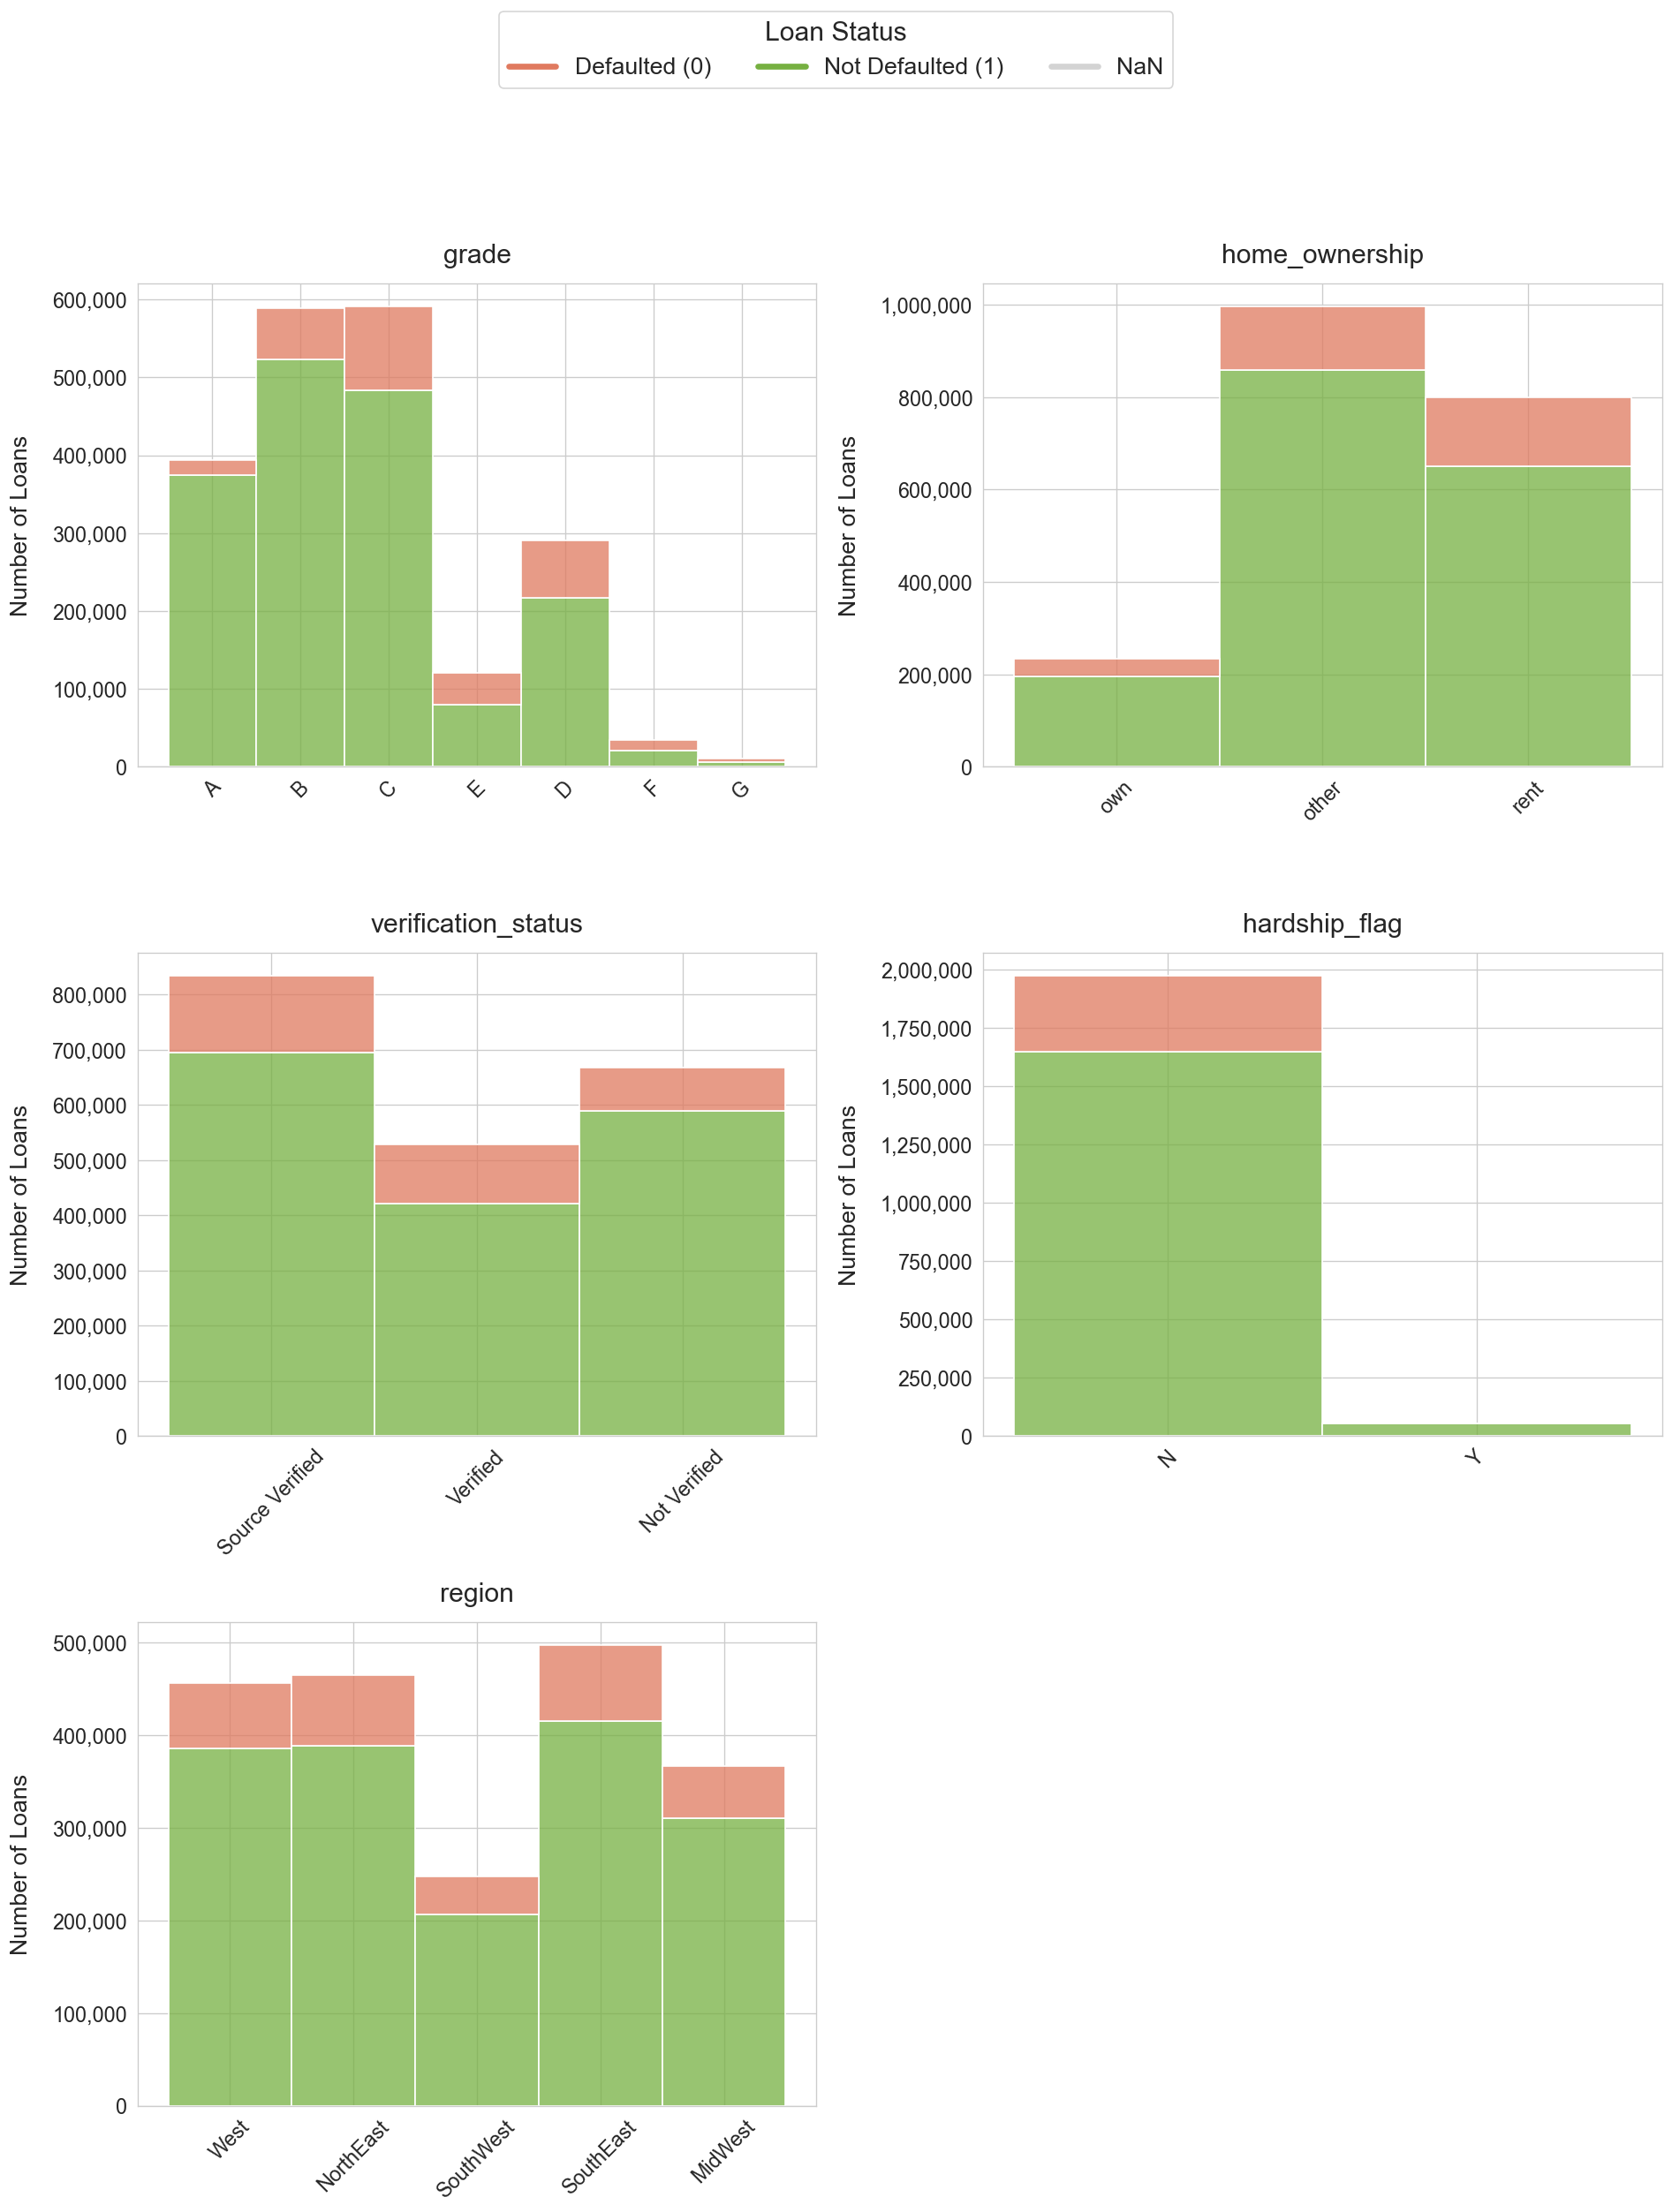

In [67]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns

# Create subplots
n_columns = 2  # Number of plots per row
n_rows = (len(object_columns) + 1) // n_columns  # Calculate number of rows
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, n_rows * 7))  # Dynamic height

# Flatten axes for easier iteration
axes = axes.flatten()

df_sorted = df.sort_values(by='loan_status_binary', ascending=True) 

# Plot each histogram
for i, column in enumerate(object_columns):
    df[column] = df[column].fillna('NaN')  # Replace NaN with a string 'NaN' for visualization
    sns.histplot(
        data=df,
        x=column,
        hue='loan_status_binary',
        multiple='stack',
        kde=False,
        palette=palette,
        hue_order=[0, 1, 'NaN'],  # Ensure NaN appears in the legend and the plot
        ax=axes[i],
        legend=False  # Suppress legends for individual plots
    )
    # Set column name as title
    axes[i].set_title(column, fontsize=18, pad=14)  # Title above each histogram
    # Remove x-axis label
    axes[i].set_xlabel('')
    # Adjust y-axis label
    axes[i].set_ylabel('Number of Loans', fontsize=16, labelpad=14)
    # Format ticks
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    # Format y-axis without scientific notation
    axes[i].yaxis.set_major_formatter(FuncFormatter(plain_formatter))

# Remove unused subplots
for j in range(len(object_columns), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the custom colors
handles = [plt.Line2D([0], [0], color=color, lw=4, label=label) 
           for label, color in zip(['Defaulted (0)', 'Not Defaulted (1)', 'NaN'], palette.values())]
fig.legend(handles=handles, loc='upper center', fontsize=16, title='Loan Status', title_fontsize=18, ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1,0.9])  # Leave space for the legend
plt.show()

#### Date Features

In [68]:
date_cols = df.select_dtypes(include=['datetime64']).columns
df[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2017-09-01,1996-06-01,2020-05-01,2020-05-01
1,2017-09-01,2005-09-01,2020-05-01,2020-05-01
2,2017-09-01,2002-04-01,2020-05-01,2020-05-01
3,2017-09-01,2000-06-01,2020-05-01,2020-05-01
4,2017-09-01,2005-12-01,2020-04-01,2020-05-01


In [69]:
df[date_cols].isna().sum()

issue_d                  0
earliest_cr_line         0
last_pymnt_d          2190
last_credit_pull_d      58
dtype: int64

In [70]:
from datetime import datetime

# Find the latest known date in the dataset to be set 
latest_known_date = df[['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']].max().max()
print("Latest date in dataset:", latest_known_date)

Latest date in dataset: 2020-09-01 00:00:00


In [71]:
#impute latest known date to distinguish missing values.
df['last_pymnt_d'].fillna(latest_known_date, inplace=True)
df['last_credit_pull_d'].fillna(latest_known_date, inplace=True)

# Time differences
df['loan_age'] = (latest_known_date - df['issue_d']).dt.days
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df['time_since_last_payment'] = (latest_known_date - df['last_pymnt_d']).dt.days
df['time_since_last_credit_pull'] = (latest_known_date - df['last_credit_pull_d']).dt.days

# Temporal components
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

# Categorical flags
df['recent_payment'] = (df['time_since_last_payment'] <= 30).astype(int)
df['recent_credit_pull'] = (df['time_since_last_credit_pull'] <= 90).astype(int)

drop = {'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'}
df.drop(drop,axis=1, inplace=True)


#### Numeric Features

In [72]:
missing = missing_data_summary(df,0)
missing_col = missing['column']
missing_col

0     mths_since_last_delinq
1                    il_util
2         mths_since_rcnt_il
3                   all_util
4                total_cu_tl
5                open_acc_6m
6               inq_last_12m
7                open_act_il
8                open_il_12m
9                open_il_24m
10              total_bal_il
11               open_rv_12m
12               open_rv_24m
13                max_bal_bc
14                    inq_fi
15     mths_since_recent_inq
16                emp_length
17          num_tl_120dpd_2m
18        mo_sin_old_il_acct
19                   bc_util
20          percent_bc_gt_75
21            bc_open_to_buy
22      mths_since_recent_bc
23                       dti
24               revol_util%
25               avg_cur_bal
26            pct_tl_nvr_dlq
27            inq_last_6mths
28             num_rev_accts
Name: column, dtype: object

In [73]:
for col in missing_col:
    overall_mean = df[col].mean()  # Compute global mean
    df[col] = df.groupby("region")[col].transform(lambda x: x.fillna(x.mean() if x.mean() is not None else overall_mean))

In [74]:
y = df.loan_status_binary
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).drop('loan_status_binary',axis=1).columns

# Concatenate numeric columns and categorical columns after encoding categorical variables (one hot encoding)
df_final = pd.concat([df[num_cols], pd.get_dummies(df[cat_cols], drop_first=True)], axis=1)

In [75]:
df_final.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,int_rate%,revol_util%,loan_age,credit_history_length,time_since_last_payment,time_since_last_credit_pull,issue_year,issue_month,recent_payment,recent_credit_pull,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_own,home_ownership_rent,verification_status_Source Verified,verification_status_Verified,hardship_flag_Y,region_NorthEast,region_SouthEast,region_SouthWest,region_West
0,120122535,12000.0,12000.0,12000.0,375.88,10.0,42000.0,27.74,0.0,715.0,719.0,0.0,35.743155,9.0,1.0,11457.0,16.0,0.00,0.00,13500.44,13500.44,12000.00,1500.44,0.0,0.0,0.0,2591.95,694.0,690.0,0.0,1.0,0.0,0.0,30502.0,1.0,2.0,1.0,3.0,8.0,19045.0,73.000000,2.0,4.0,7117.0,53.0,31000.0,1.0,1.0,2.0,7.0,3389.0,7144.0,53.9,0.0,0.0,131.0,255.0,1.0,1.0,0.0,14.0,8.000000,0.0,2.0,6.0,2.0,2.0,7.0,7.0,9.0,6.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,57180.0,30502.0,15500.0,26180.0,0,7.97,37.0,1096,7762,123,123,2017,9,0,0,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,119374887,32000.0,32000.0,32000.0,1062.71,10.0,155000.0,12.35,2.0,715.0,719.0,1.0,10.000000,20.0,0.0,48309.0,42.0,6158.89,6158.89,31838.67,31838.67,25841.11,5997.56,0.0,0.0,0.0,0.00,674.0,670.0,0.0,1.0,0.0,0.0,405751.0,2.0,1.0,1.0,1.0,8.0,15582.0,78.000000,4.0,7.0,14049.0,40.0,142600.0,0.0,2.0,2.0,8.0,22542.0,81313.0,34.5,0.0,0.0,91.0,144.0,1.0,1.0,3.0,1.0,1.000000,0.0,7.0,10.0,12.0,27.0,3.0,18.0,36.0,10.0,20.0,0.0,0.0,0.0,5.0,94.9,0.0,0.0,0.0,527034.0,63891.0,124200.0,20034.0,0,11.99,34.1,1096,4383,123,123,2017,9,0,0,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False
2,119321612,40000.0,40000.0,40000.0,952.65,9.0,120000.0,31.11,0.0,765.0,769.0,0.0,35.271183,12.0,0.0,13389.0,26.0,22376.90,22376.90,30417.91,30417.91,17623.10,12794.81,0.0,0.0,0.0,952.65,769.0,765.0,0.0,1.0,0.0,0.0,227506.0,2.0,3.0,2.0,4.0,3.0,140872.0,26.000000,0.0,0.0,10609.0,22.0,64600.0,2.0,3.0,1.0,4.0,20682.0,51211.0,20.7,0.0,0.0,122.0,185.0,26.0,3.0,4.0,26.0,11.000000,0.0,4.0,4.0,6.0,8.0,9.0,7.0,13.0,4.0,12.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,367745.0,154261.0,64600.0,168145.0,0,15.05,20.7,1096,5632,123,123,2017,9,0,0,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,120122034,16000.0,16000.0,16000.0,501.17,5.0,79077.0,15.94,0.0,700.0,704.0,0.0,38.000000,12.0,0.0,16217.0,20.0,2455.43,2455.43,15527.57,15527.57,13544.57,1983.00,0.0,0.0,0.0,0.00,674.0,670.0,0.0,1.0,0.0,0.0,128572.0,0.0,1.0,0.0,0.0,38.0,112355.0,70.359672,0.0,0.0,2959.0,58.0,28100.0,0.0,0.0,0.0,0.0,10714.0,336.0,90.9,0.0,0.0,145.0,207.0,32.0,32.0,0.0,206.0,7.149613,2.0,2.0,11.0,2.0,2.0,9.0,11.0,11.0,11.0,12.0,0.0,0.0,0.0,0.0,78.9,100.0,0.0,0.0,125018.0,128572.0,3700.0,96918.0,0,7.97,57.7,1096,6301,123,123,2017,9,0,0,False,False,Fals

In [76]:
df_final['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2
df_final.drop(['fico_range_low', 'fico_range_high', 'last_fico_range_low', 'last_fico_range_high'], axis=1, inplace=True)
df_final.drop('id', axis=1, inplace=True)

#### Correlation Analysis to identify features strongly correlated to target variable

In [78]:
correlations = df_final.corrwith(y).abs()

# Convert to DataFrame and sort
correlation_df = correlations.sort_values(ascending=False).reset_index()
correlation_df.columns = ['name', 'correlation']

# Display the resulting DataFrame
correlation_df.head(30)

,name,correlation
0,recoveries,0.528278
1,collection_recovery_fee,0.520392
2,debt_settlement_flag,0.357692
3,total_rec_prncp,0.343479
4,time_since_last_credit_pull,0.296709
5,last_pymnt_amnt,0.242224
6,total_pymnt_inv,0.238166
7,total_pymnt,0.238158
8,int_rate%,0.230647
9,time_since_last_payment,0.219087


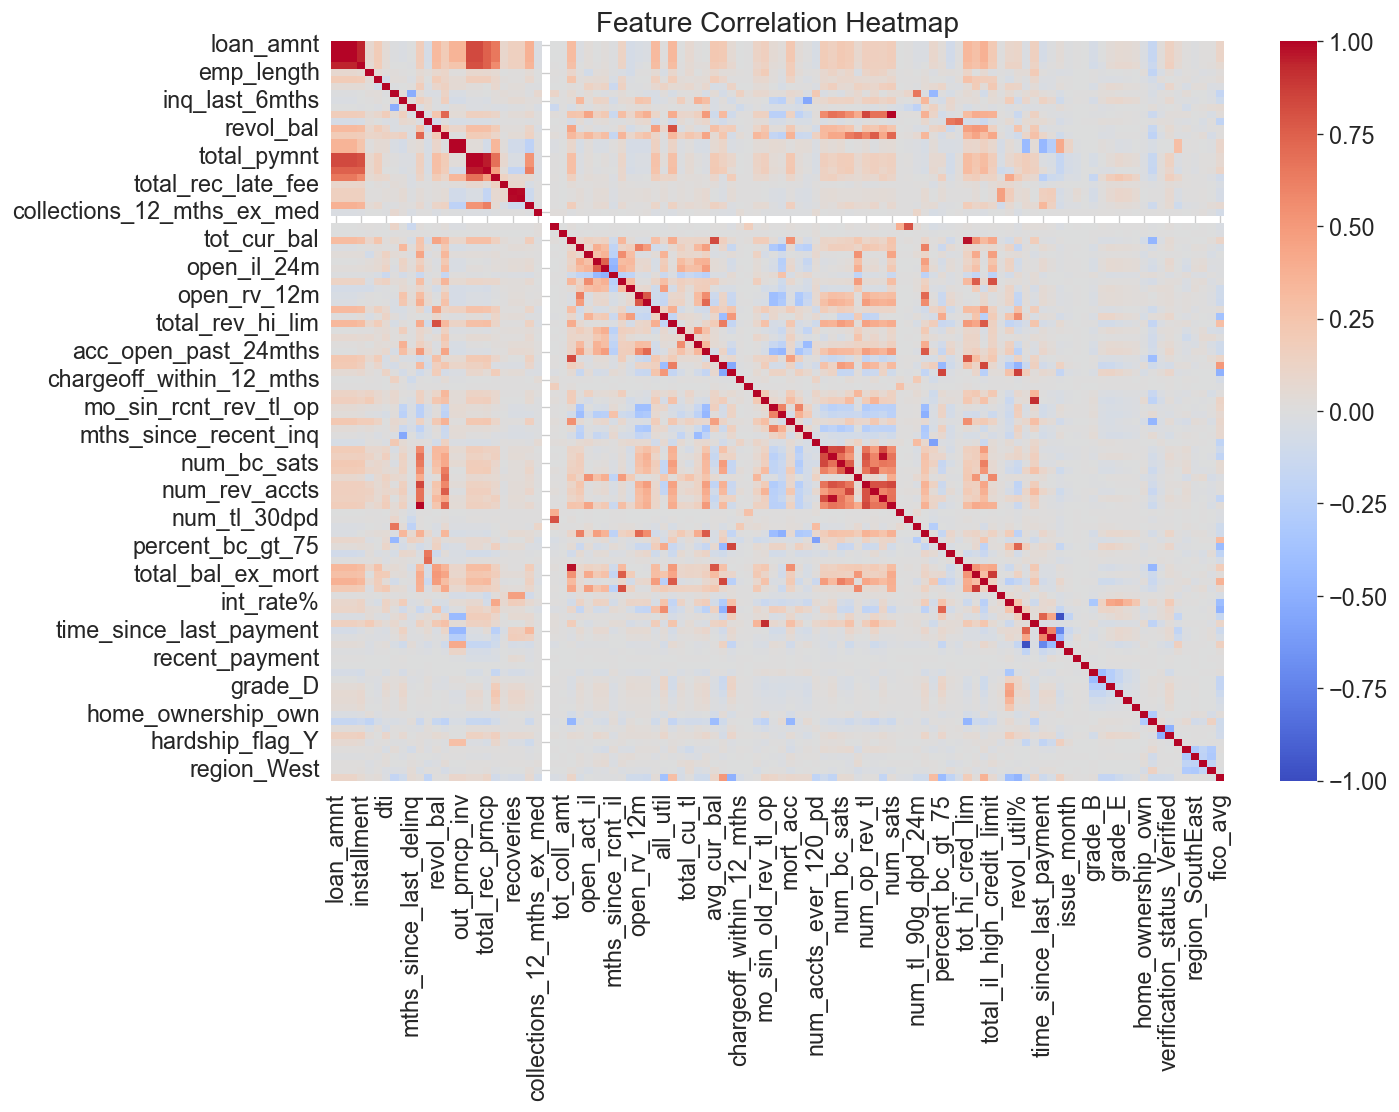

In [79]:
# Compute correlation matrix for independent variables
feature_corr = df_final.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [80]:
# Identify pairs of highly correlated features
threshold = 0.8
high_corr_pairs = feature_corr.abs().stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > threshold]
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs

,Feature1,Feature2,Correlation
1,loan_amnt,funded_amnt,0.999999
2,loan_amnt,funded_amnt_inv,0.999994
3,loan_amnt,installment,0.945133
16,loan_amnt,total_pymnt,0.828604
17,loan_amnt,total_pymnt_inv,0.828653
...,...,...,...
8160,total_il_high_credit_limit,total_bal_ex_mort,0.878709
8446,revol_util%,bc_util,0.861725
8590,loan_age,issue_year,0.978079
8660,credit_history_length,mo_sin_old_rev_tl_op,0.915238


#### Feature Selection and Training
1. Selection based on Correlation
    - Highly correlated features should be removed to improve model performance, reduce redundancy and avoid over fitting. 
2. Further features selection with Recursive Feature Elimination

In [81]:
# Create a set to store features to drop
features_to_drop = set()

# Iterate through each pair of highly correlated features
for _, row in high_corr_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    
    # Get the correlation with the target for both features
    corr1 = correlation_df[correlation_df['name'] == feature1]['correlation'].values[0]
    corr2 = correlation_df[correlation_df['name'] == feature2]['correlation'].values[0]
    
    # Drop the feature with lower correlation with the target
    if corr1 >= corr2:
        features_to_drop.add(feature2)
    else:
        features_to_drop.add(feature1)

# Drop features from your dataset
selected_features = [col for col in feature_corr.columns if col not in features_to_drop]

# Print the results
print(f"Features to drop: {features_to_drop}")
print(f"Remaining features: {len(selected_features)}")

Features to drop: {'total_bal_il', 'installment', 'num_bc_tl', 'revol_util%', 'total_pymnt_inv', 'loan_amnt', 'tot_cur_bal', 'collection_recovery_fee', 'open_acc', 'issue_year', 'out_prncp_inv', 'num_tl_30dpd', 'num_bc_sats', 'funded_amnt_inv', 'num_rev_tl_bal_gt_0', 'total_il_high_credit_limit', 'funded_amnt', 'credit_history_length', 'total_pymnt', 'num_op_rev_tl', 'revol_bal', 'num_actv_bc_tl', 'num_sats', 'bc_util', 'total_bc_limit'}
Remaining features: 81


In [82]:
df_final['loan_amnt_div_instlmnt']=df_final['loan_amnt']/df_final['installment']

In [83]:
df_final.drop(features_to_drop,axis=1, inplace=True)

In [84]:
X = df_final

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Select features with importance above a threshold
model = SelectFromModel(rf, prefit=True, threshold="mean")
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

print(f"Original features: {X.shape[1]}, Selected features: {X_train_selected.shape[1]}")

# Get the mask of selected features
selected_features_mask = model.get_support()

# Get the names of the selected features
selected_features_names = np.array(X.columns)[selected_features_mask]
selected_features_names

Original features: 82, Selected features: 12


array(['out_prncp', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'debt_settlement_flag', 'int_rate%', 'loan_age',
       'time_since_last_payment', 'time_since_last_credit_pull',
       'loan_amnt_div_instlmnt'], dtype=object)

### Training Models

In [87]:
# Define a function to evaluate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Results for {model_name}:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F2 Score: {f2:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\n")
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Recall": recall,
        "F2": f2,
        "AUC": auc
    }

Results for Logistic Regression:
Confusion Matrix:
[[ 56134   8776]
 [  1957 339124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     64910
           1       0.97      0.99      0.98    341081

    accuracy                           0.97    405991
   macro avg       0.97      0.93      0.95    405991
weighted avg       0.97      0.97      0.97    405991

Accuracy: 0.9736
Recall: 0.9943
F2 Score: 0.9903
AUC: 0.9827


Results for Random Forest:
Confusion Matrix:
[[ 63383   1527]
 [   282 340799]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     64910
           1       1.00      1.00      1.00    341081

    accuracy                           1.00    405991
   macro avg       1.00      0.99      0.99    405991
weighted avg       1.00      1.00      1.00    405991

Accuracy: 0.9955
Recall: 0.9992
F2 Score: 0.9984
AUC: 0.9984


Result

<Figure size 480x480 with 0 Axes>

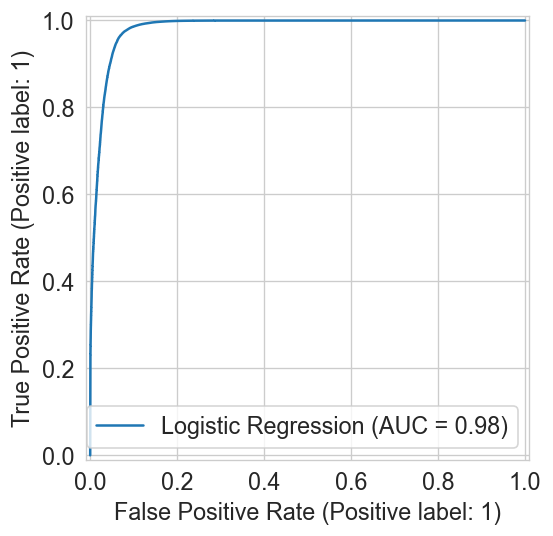

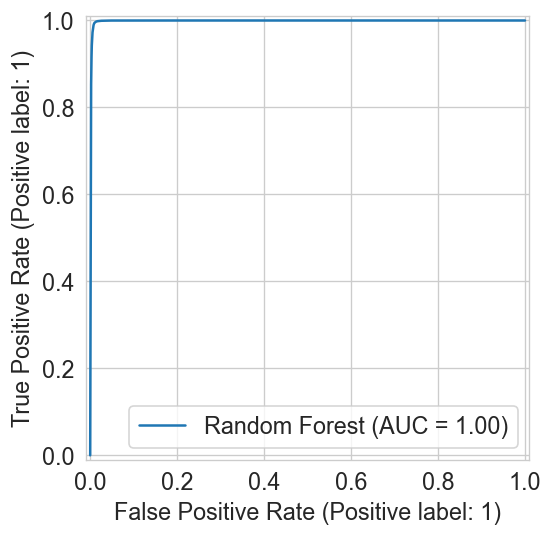

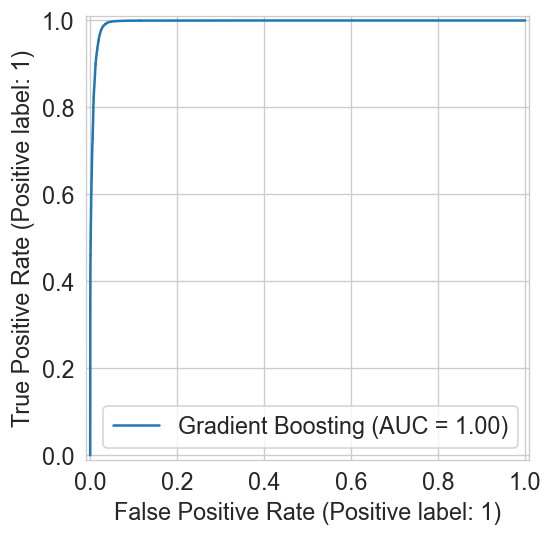

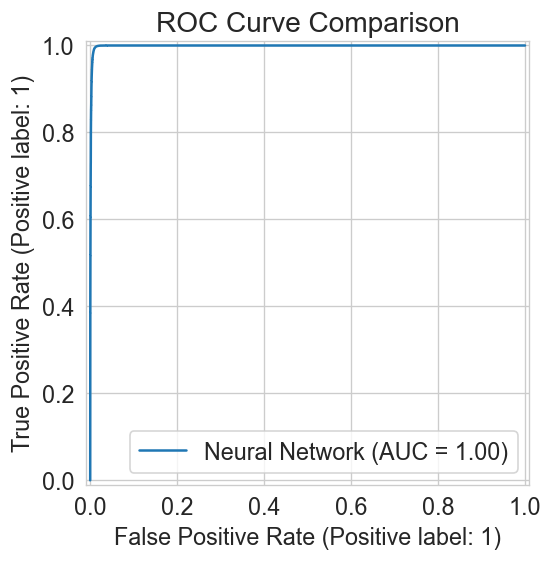

Summary of Results:
                 Model  Accuracy    Recall        F2       AUC
0  Logistic Regression  0.973563  0.994262  0.990303  0.982653
1        Random Forest  0.995544  0.999173  0.998444  0.998420
2    Gradient Boosting  0.986985  0.999261  0.996468  0.995586
3       Neural Network  0.996293  0.999097  0.998576  0.998871


In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, fbeta_score, roc_auc_score,
    classification_report, RocCurveDisplay)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_selected, y_train)

# Random Forest Model
rf_soft = RandomForestClassifier(n_estimators=100, random_state=42)
rf_soft.fit(X_train_selected, y_train)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42, solver='adam')
nn_model.fit(X_train_selected, y_train)

# Update the evaluation code to include all four models
results = []
results.append(evaluate_model(lr_model, X_test_selected, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_soft, X_test_selected, y_test, "Random Forest"))
results.append(evaluate_model(gb_model, X_test_selected, y_test, "Gradient Boosting"))
results.append(evaluate_model(nn_model, X_test_selected, y_test, "Neural Network"))

# Plot ROC Curves for all models
plt.figure(figsize=(4, 4))
RocCurveDisplay.from_estimator(lr_model, X_test_selected, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_soft, X_test_selected, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(gb_model, X_test_selected, y_test, name="Gradient Boosting")
RocCurveDisplay.from_estimator(nn_model, X_test_selected, y_test, name="Neural Network")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# Summarize the results in a DataFrame

results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)